<a href="https://colab.research.google.com/github/lXmetra/curso-estadistica-multivariante/blob/master/Seccion%201%20Introducci%C3%B3n%20al%20espacio%20multivariante/C%C3%B3digos/Python/1.E%20Cancer_dataset_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import scipy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves


# Subir el archivo
df=pd.read_csv('https://raw.githubusercontent.com/lXmetra/curso-estadistica-multivariante/master/Seccion%201%20Introducci%C3%B3n%20al%20espacio%20multivariante/Datos/cancerdata.csv')
df.head()




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Contar valores para cada grupo de variables (Categorías en "Species")
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

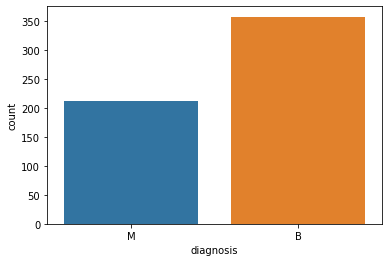

In [ ]:
#Ver los contadores gráficamente
sns.countplot('diagnosis',data=df)
plt.show()

In [ ]:
# Notemos que 'diagnosis' es dtype: int64, y queremos que sea categorica:
df['diagnosis']= df['diagnosis'].astype('category')


In [ ]:
# Obtener información sobre missing values, variables sobrantes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

In [ ]:
# Notemos que hay una variable que sobra, "Unnamed:32" que ademas solo tiene valores NaN
df['Unnamed: 32'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 32, dtype: float64

In [ ]:
# Vamos a eliminar las variables 'id' y 'Unnamed: 32'
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Hay valores nulos?
print('Hay valores nulos? ',df.isnull().values.any())

Hay valores nulos?  False


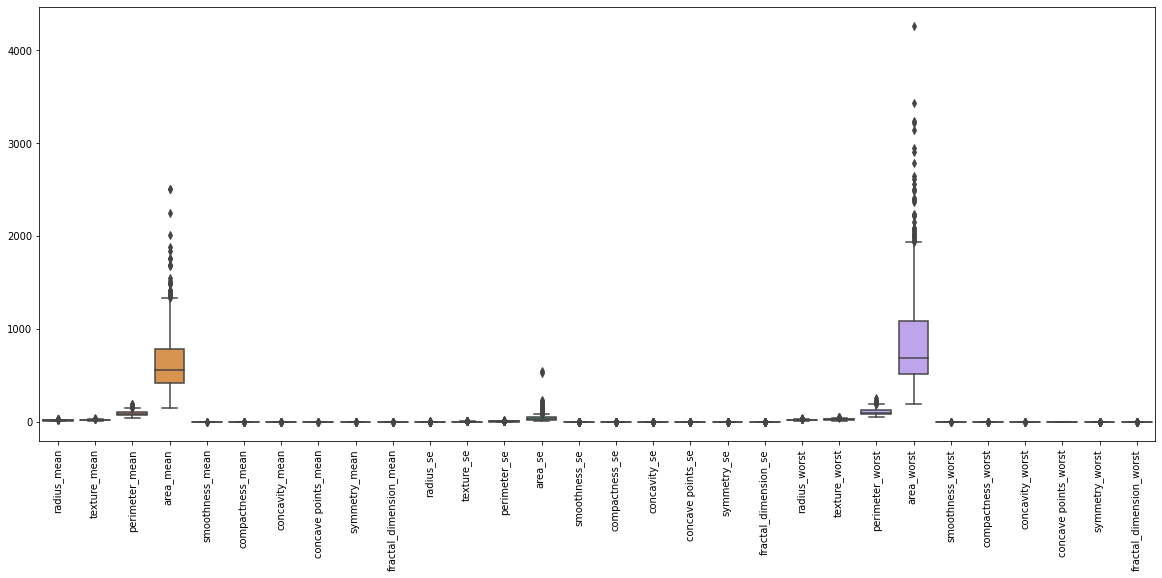

In [ ]:
# Boxplots
plt.figure(figsize=(20,8))
sns.boxplot( data = df )
plt.xticks(rotation=90) # rotar 90% el texto con el nombre de cada variable
plt.show()
# Como se puede observar tenemos diferentes rangos y esto afecta la visualización

In [ ]:
y =   df[df.columns[0]]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): [B, M]

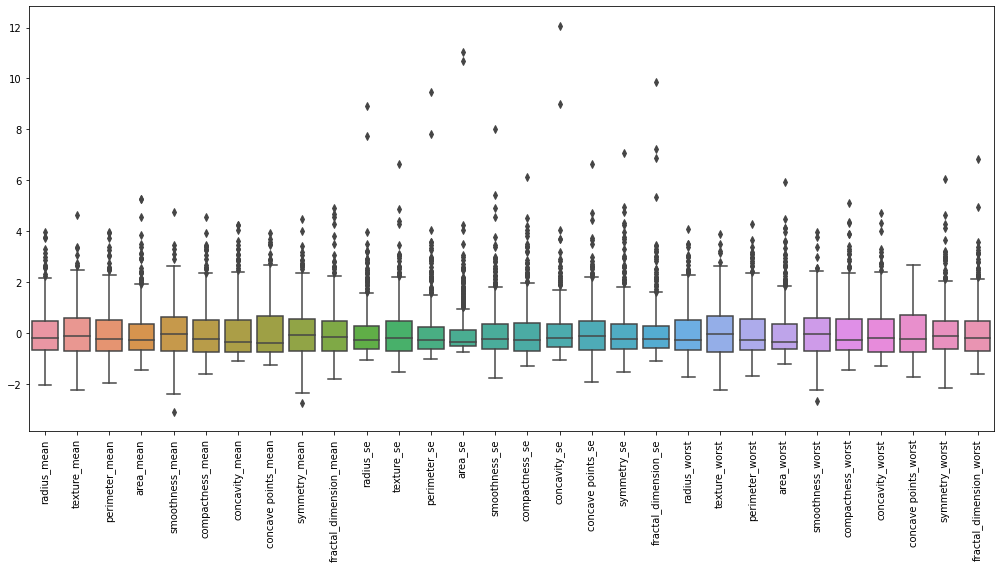

In [ ]:
# Estandarizamos para tener variables con los mismos rangos
# y =   df[df.columns[0]]
df_features= df[df.columns[1:]] # Escogemos de df las columnas numericas 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_features.values)
df_features_scaled = pd.DataFrame(scaled_features, index=df_features.index, columns=df_features.columns)

# Boxplots con variables estandarizadas
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled )
plt.xticks(rotation=90)  

plt.tight_layout()

**Un enfoque estadístico robusto** habría considerado valores atípicos a todos los valores que superan 3 (o 2.5) en el eje Y. sin embargo, dado el rango limitado de distribución de datos (de aproximadamente -2.5 a aproximadamente +11) y la disponibilidad de datos que no es muy alta (solo 569 observaciones), se podría utilizar un enfoque "visual" para la detección de los valores atípicos (basado en densidad de los puntos por encima de un umbral específico). Por ejemplo, eliminar las observaciones que superan el valor 6 (muy lejos de la media).

**Los valores atípicos** podrían ser indicativos de datos incorrectos, procedimientos erróneos o áreas experimentales donde algunas teorías pueden no ser válidas. Antes de eliminarlos, deberíamos discutir con expertos en este dominio para entender por qué estos datos no son válidos (por ejemplo, el equipo de medición falló, el método de medición fue poco confiable por alguna razón, había contaminantes, etc).

(557, 30)


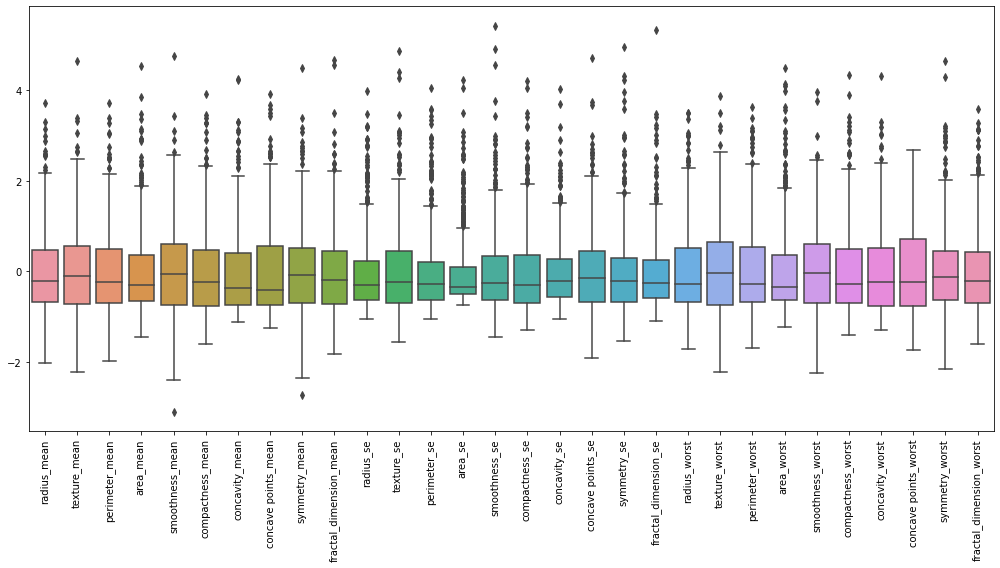

In [ ]:
# Eliminando atípicos
df_features_clean=df_features_scaled[df_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]
print(df_features_clean.shape)

plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_clean )
plt.xticks(rotation=90)  
plt.tight_layout()

<Figure size 1008x576 with 0 Axes>

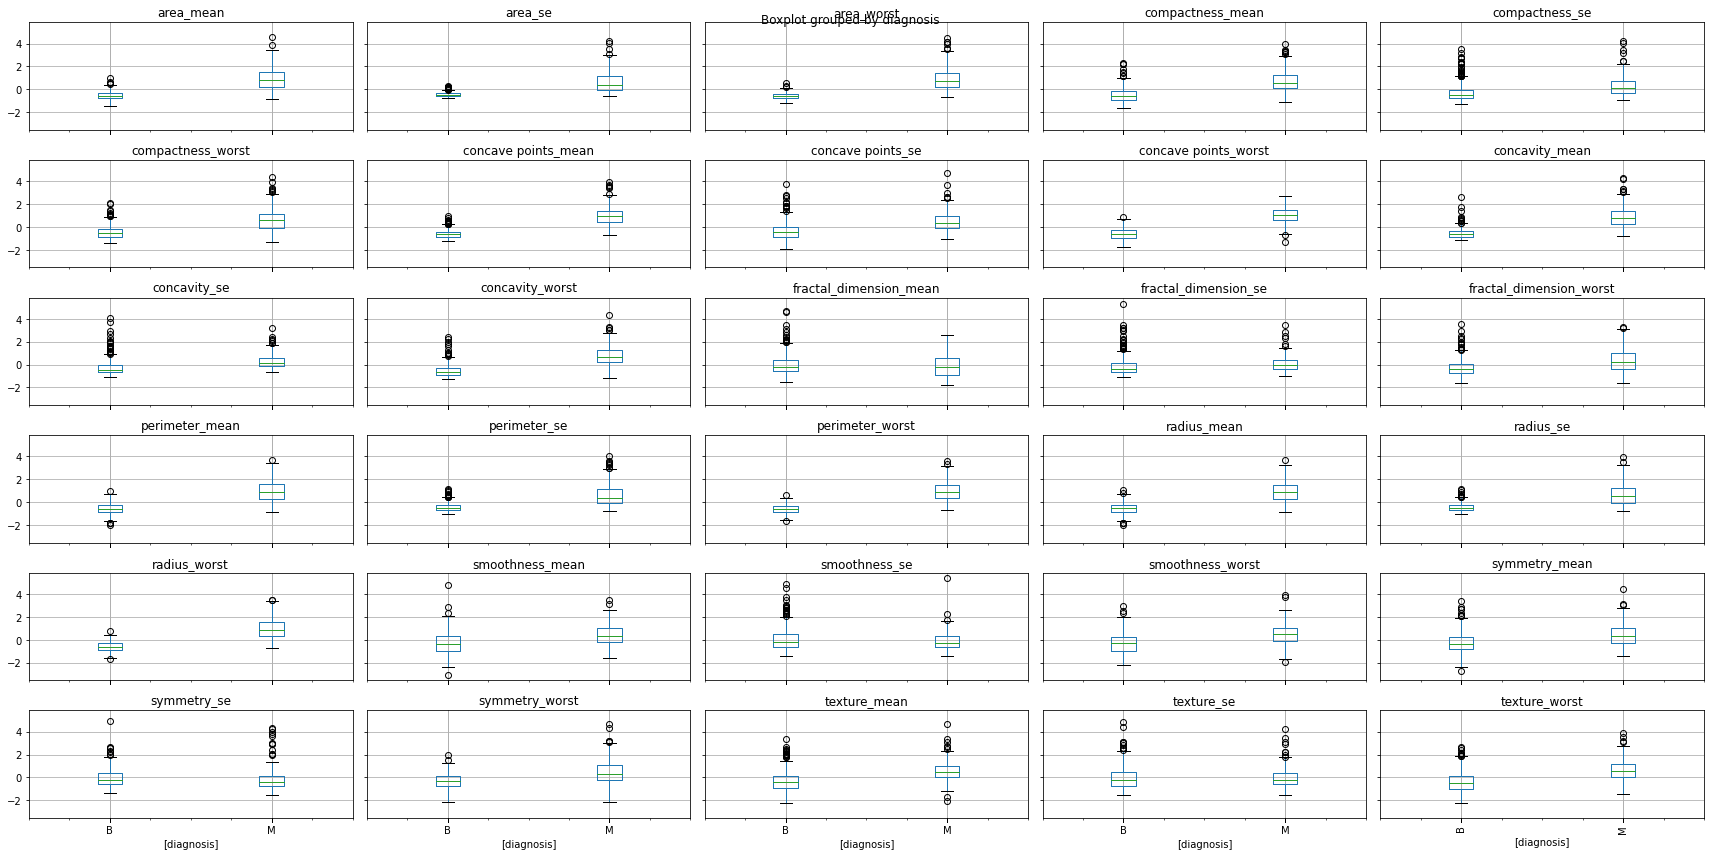

In [ ]:
#Boxplots para cada variable divididos por grupos en Especie
df_features_y_clean = pd.concat([df_features_clean, y], axis=1).reindex(df_features_clean.index)
df_features_clean=df_features_clean.reindex(index=[i for i in range(df_features_clean.shape[0])])
df_features_clean = df_features_y_clean.iloc[:,0:30]
df_y = df_features_y_clean.iloc[:,30]



plt.figure(figsize=(14,8))
df_features_y_clean.boxplot(by="diagnosis", figsize=(24, 12))
plt.xticks(rotation=90)  
plt.tight_layout()


In [ ]:
df_y.shape

(569,)

In [ ]:
# Convertir M a 1 y B a 0:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Vamos a dividir los datos en tres grupos
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


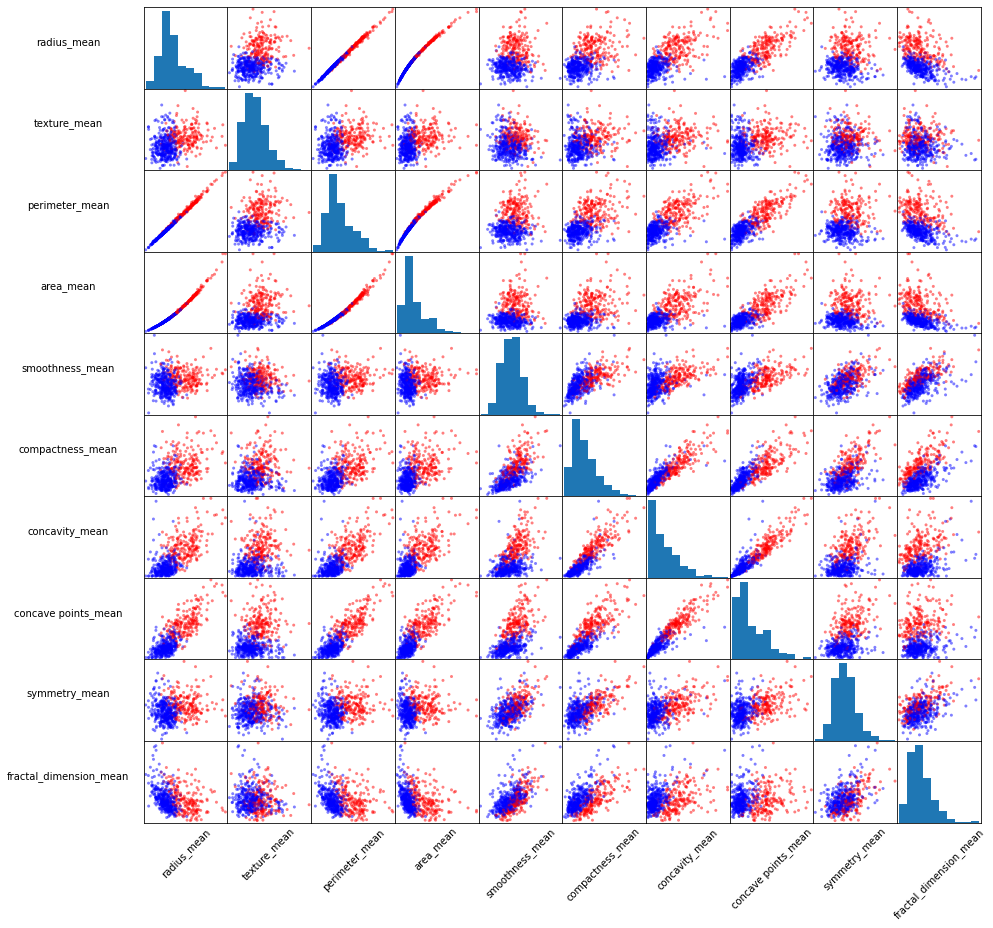

In [ ]:
from pandas.plotting import scatter_matrix
color_function = {0: "blue", 1: "red"} # rojo: Malign y azul: Benign
colors = df["diagnosis"].map(lambda x: color_function.get(x))

sm=scatter_matrix(df[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # Solo para features_mean

# Cambiar orientacion de labels
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.9,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

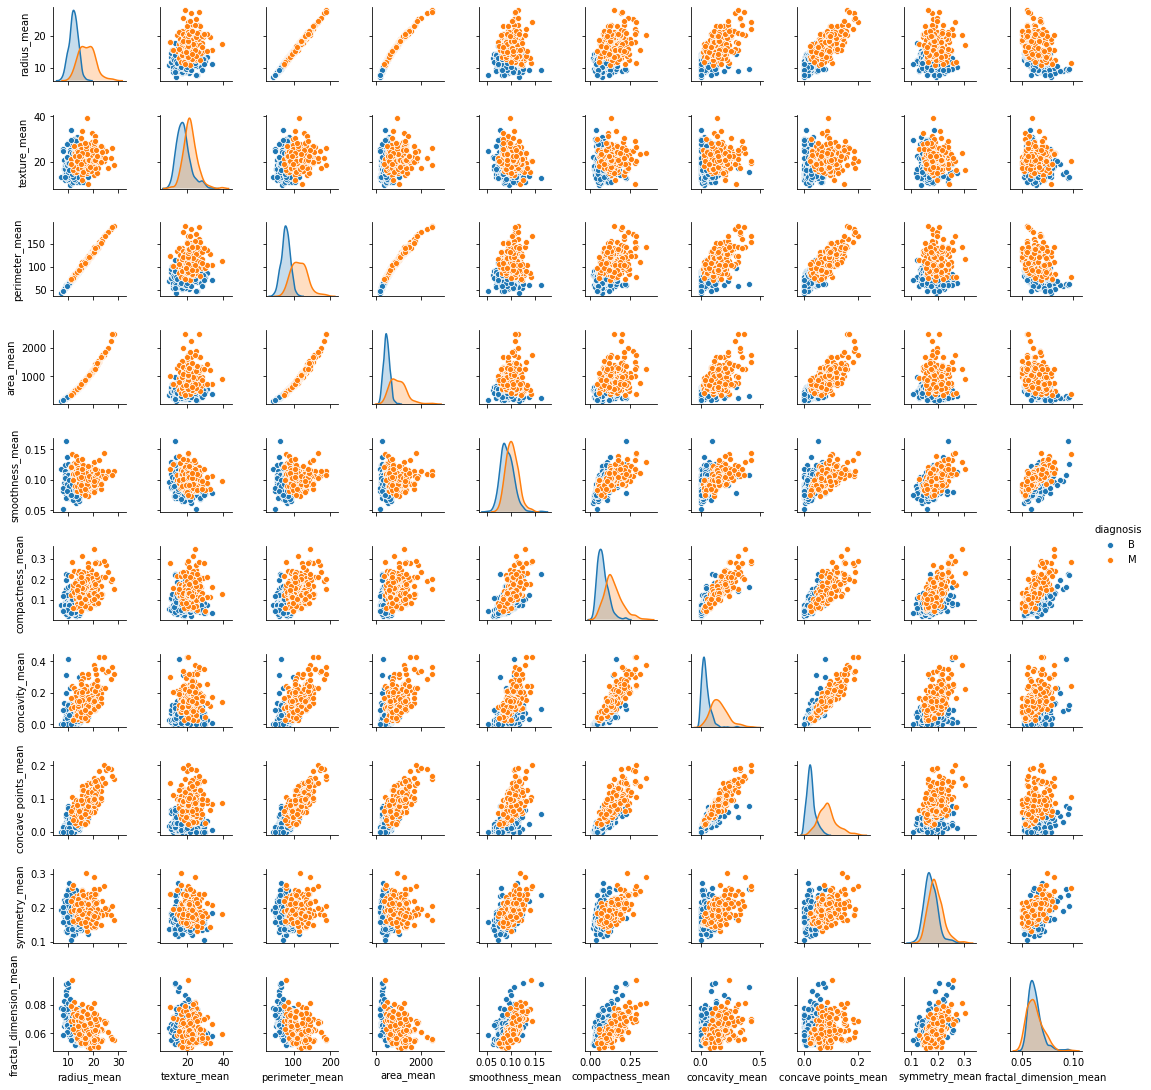

In [ ]:
# Con la libreria seaborn y si queremos que salgan kernel densities en vez de histogramas en la diagonal
sns.pairplot(  pd.concat([df_features[features_mean],y], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True),height=1.5)
# sns.pairplot(  pd.concat([df_features[features_se],y], axis=1),    hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True),height=1.5)
# sns.pairplot(  pd.concat([df_features[features_worst],df_y], axis=1), hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True),height=1.5)

(30.5, -0.5)

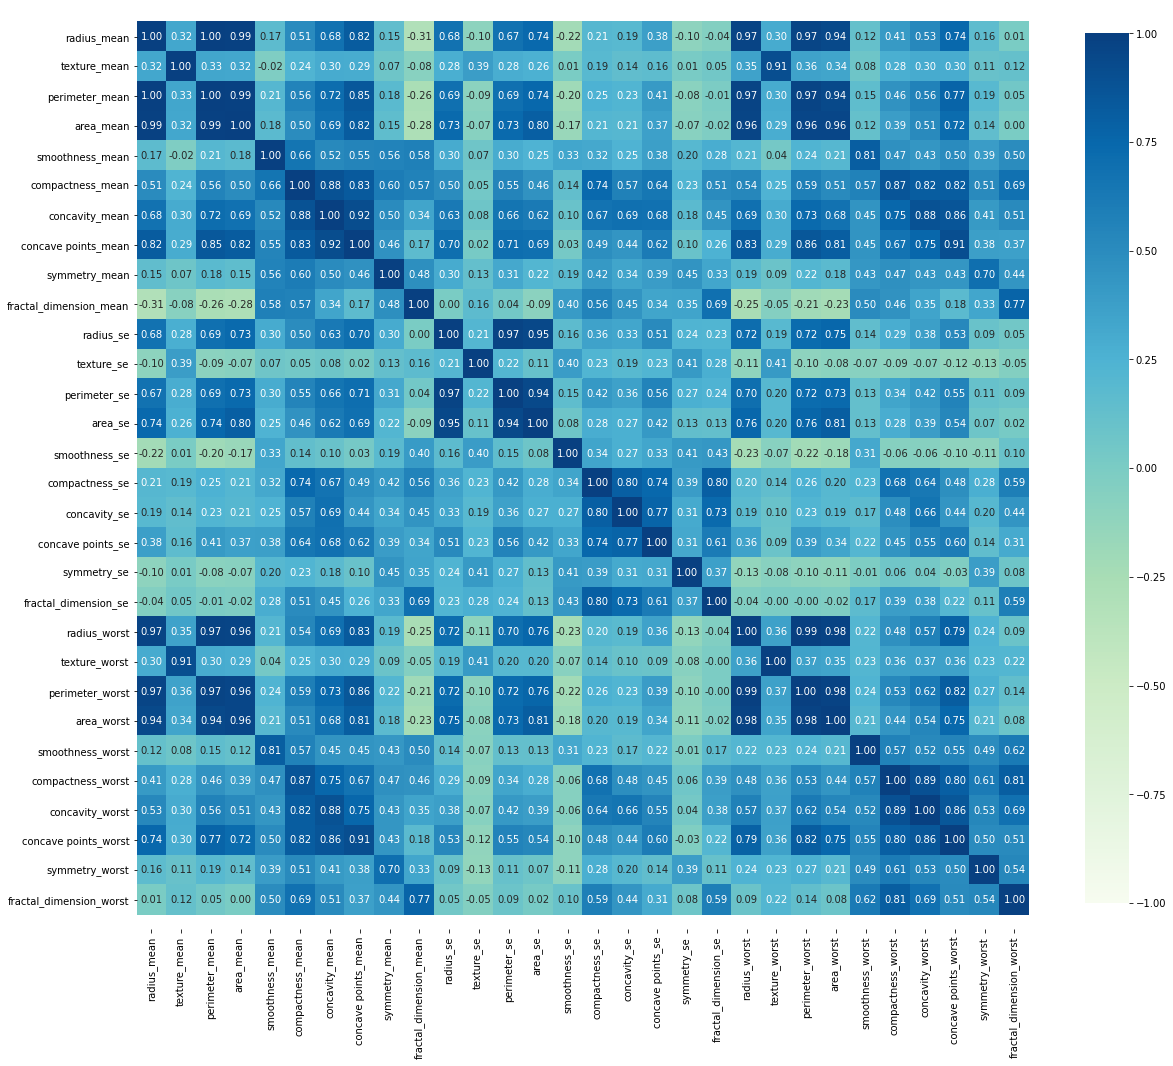

In [ ]:
# Matriz de covarianza numerica 
cov_matrix = df_features.cov()

# Matriz de correlaciones numerica 
correlation_matrix = df_features.corr()


# Matriz de correlaciones gráfica 
plt.figure(figsize=(20,20))
ax=sns.heatmap(correlation_matrix,  vmax=1, vmin=-1,cbar_kws={"shrink": .8},square=True, annot=True,fmt='.2f', cmap ='GnBu',center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


(10.0, -1.0)

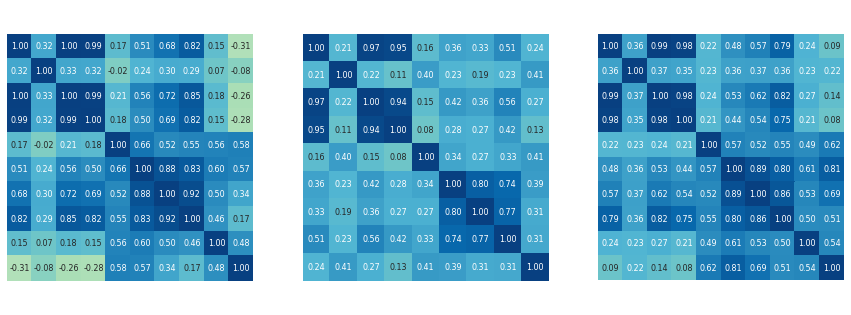

In [ ]:
# Separadas por grupos

plt.figure(figsize=(15,7))

plt.subplot(1, 3, 1)
ax1=sns.heatmap( df_features[features_mean].corr(),xticklabels=False, yticklabels=False , cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},vmax=1, vmin=-1, cmap ='GnBu',center=0)
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(1, 3, 2)
ax2=sns.heatmap(df_features[features_se].corr(),xticklabels=False, yticklabels=False , cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},vmax=1, vmin=-1, cmap ='GnBu',center=0)
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(1, 3, 3)
ax3=sns.heatmap(df_features[features_worst].corr(),xticklabels=False, yticklabels=False , cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},vmax=1, vmin=-1, cmap ='GnBu',center=0)
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)


In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Guardamos solo las variables asociadas a mean (incluyendo la ultima columna: diagnosis)
y_clean=df_features_y_clean['diagnosis']
variables_clean=df_features_y_clean[features_mean]
todo_clean_mean=pd.concat([variables_clean,y_clean], axis=1)
todo_clean_mean


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,M
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,M
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,M
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,M
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,M


In [ ]:
parallel_coordinates?

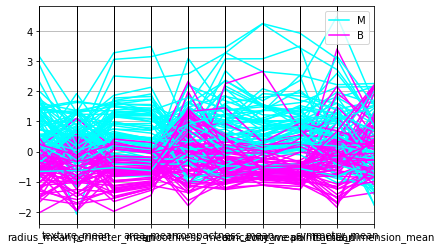

In [ ]:
#Coordenadas paralelas
from pandas.plotting import parallel_coordinates
parallel_coordinates(todo_clean_mean[0:150], "diagnosis",colormap='cool',xticks=None)
plt.show()


In [ ]:
andrews_curves?

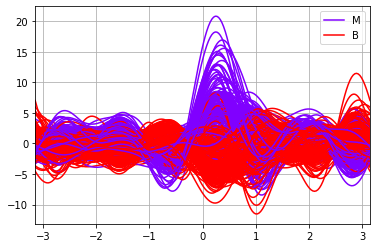

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(todo_clean_mean, "diagnosis",colormap='rainbow')
plt.show()